
## **Métricas de Agrupamiento (K-means y DBSCAN) (Core)**

En esta actividad, se utilizarán los algoritmos K-means y DBSCAN para agrupar datos del dataset «Credit Card Data» disponible en Kaggle. El objetivo es aplicar ambas técnicas de clustering y compararlas utilizando métricas como el «silhouette score» y el «calinski-harabasz index» para evaluar la calidad de los clusters obtenidos.

**Enlace al dataset:** https://www.kaggle.com/arjunbhasin2013/ccdata



### **Objetivo:**

El objetivo es comparar la efectividad de K-means y DBSCAN en el dataset seleccionado, evaluando la cohesión e intersección de los clusters obtenidos mediante métricas de evaluación. Se espera que los estudiantes comprendan las diferencias entre ambos algoritmos y cómo usar las métricas adecuadas para elegir el mejor modelo de clustering.



### **Instrucciones:**

#### **1. Carga de datos:**
- Descarga y carga el dataset «Credit Card Data» de Kaggle. Realiza una exploración inicial de las variables y observa cómo se distribuyen.
- Este dataset incluye información sobre los comportamientos de clientes de tarjetas de crédito. Variables como el monto total de gastos, el número de compras y el saldo de la cuenta son de interés para el agrupamiento.

#### **2. Exploración y preprocesamiento de datos:**
- Realiza una limpieza inicial de los datos, eliminando valores atípicos y manejando cualquier valor nulo presente en el dataset.
- Estandariza las variables para asegurar que el rango de las características no afecte el rendimiento de los algoritmos de clustering.
- Selecciona las características más relevantes para el análisis, como los montos de compras y la frecuencia de uso de la tarjeta.

#### **3. Aplicación de K-means y DBSCAN:**
- Implementa primero el algoritmo K-means para agrupar los clientes. Determina el número óptimo de clusters utilizando el método del codo y calcula el «silhouette score» para evaluar la cohesión de los clusters formados.
- Luego, aplica DBSCAN al mismo conjunto de datos. Experimenta con diferentes valores de epsilon y min_samples para obtener un clustering que capture tanto los clusters densos como los outliers.
 
#### **4. Comparación mediante métricas:**

Calcula y compara las siguientes métricas de evaluación para ambos algoritmos:

- Silhouette Score: Esta métrica mide cuán similares son los puntos dentro del mismo cluster en comparación con los puntos de otros clusters.
- Calinski-Harabasz Index: Esta métrica evalúa la dispersión entre los clusters y dentro de ellos, con mayores valores indicando una mejor definición de clusters.
- Visualiza ambos agrupamientos utilizando gráficos de dispersión para comparar visualmente cómo K-means y DBSCAN dividen los datos.

#### **5. Interpretación de resultados:**
- Discute cuál de los dos algoritmos ofrece un mejor rendimiento en este dataset basado en las métricas calculadas. ¿Los clusters formados por K-means son más cohesivos que los obtenidos con DBSCAN?
- Analiza también los outliers detectados por DBSCAN. ¿Estos puntos tienen comportamientos inusuales en comparación con los clientes agrupados por K-means?



### **Análisis de Resultados:**

- En esta sección, evalúa los resultados de ambos algoritmos y discute cuál de ellos es más adecuado para este tipo de datos. Considera la forma de los clusters, la presencia de outliers y las métricas de evaluación para justificar tu elección.
- Genera un reporte que incluya gráficas comparativas y explique por qué se prefirió un algoritmo sobre el otro. Discute también las limitaciones de cada uno en este caso.



### **Conclusión:**

- Esta actividad busca aplicar y comparar dos técnicas de clustering utilizando métricas estándar de evaluación. A través de esta comparación, se espera que los estudiantes entiendan las fortalezas y debilidades de K-means y DBSCAN, y cómo seleccionar el mejor modelo para diferentes tipos de datos.

Data Dict:

| **Column Name**                  | **Description**                                                                 |
|----------------------------------|---------------------------------------------------------------------------------|
| **CUST_ID**                      | Identification of Credit Card holder (Categorical)                             |
| **BALANCE**                      | Balance amount left in their account to make purchases                         |
| **BALANCE_FREQUENCY**            | How frequently the Balance is updated (0 = not frequently, 1 = frequently)     |
| **PURCHASES**                    | Amount of purchases made from account                                          |
| **ONEOFF_PURCHASES**             | Maximum purchase amount done in one-go                                         |
| **INSTALLMENTS_PURCHASES**       | Amount of purchase done in installment                                         |
| **CASH_ADVANCE**                 | Cash in advance given by the user                                              |
| **PURCHASES_FREQUENCY**          | How frequently Purchases are being made (0 = not frequently, 1 = frequently)   |
| **ONEOFFPURCHASESFREQUENCY**     | How frequently Purchases are happening in one-go (0 = not frequently, 1 = frequently) |
| **PURCHASESINSTALLMENTSFREQUENCY** | How frequently purchases in installments are being done (0 = not frequently, 1 = frequently) |
| **CASHADVANCEFREQUENCY**         | How frequently the cash in advance is being paid                               |
| **CASHADVANCETRX**               | Number of Transactions made with "Cash in Advance"                             |
| **PURCHASES_TRX**                | Number of purchase transactions made                                           |
| **CREDIT_LIMIT**                 | Limit of Credit Card for user                                                  |
| **PAYMENTS**                     | Amount of Payment done by user                                                 |
| **MINIMUM_PAYMENTS**             | Minimum amount of payments made by user                                        |
| **PRCFULLPAYMENT**               | Percent of full payment paid by user                                           |
| **TENURE**                       | Tenure of credit card service for user                                         |

### **Librerias y dataset**

In [1]:
import os
import pandas as pd
import numpy as np
import utils
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import kaggle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
# Descargar el dataset
path = kagglehub.dataset_download("arjunbhasin2013/ccdata")
print("Path to dataset files:", path)
# Cargar el dataset
dataset_path = os.path.join(path, "CC GENERAL.csv")
df = pd.read_csv(dataset_path, header=0)

Path to dataset files: C:\Users\guill\.cache\kagglehub\datasets\arjunbhasin2013\ccdata\versions\1


### **Exploratory Data Analysis**

In [3]:
print("Dimensiones del dataset:")
print(f"Features: {df.shape[1]}, Ejemplos: {df.shape[0]}")
print("Primeras 10 filas del dataset:")
df.head(10)

Dimensiones del dataset:
Features: 18, Ejemplos: 8950
Primeras 10 filas del dataset:


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


Eliminamos la columna 'CUST_ID' porque no aporta nada

In [4]:
df.drop(['CUST_ID'], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

#### **Analisis de duplicados**

In [6]:
duplicados = df.duplicated() # Identificar duplicados
num_duplicados = duplicados.sum() # Contar el número de duplicados
print(f"Número de registros duplicados en el dataset: {num_duplicados}")

Número de registros duplicados en el dataset: 0


#### **Imputamos de valores**

In [7]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())


In [9]:
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())


In [10]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

#### **Analisis de distribucion**

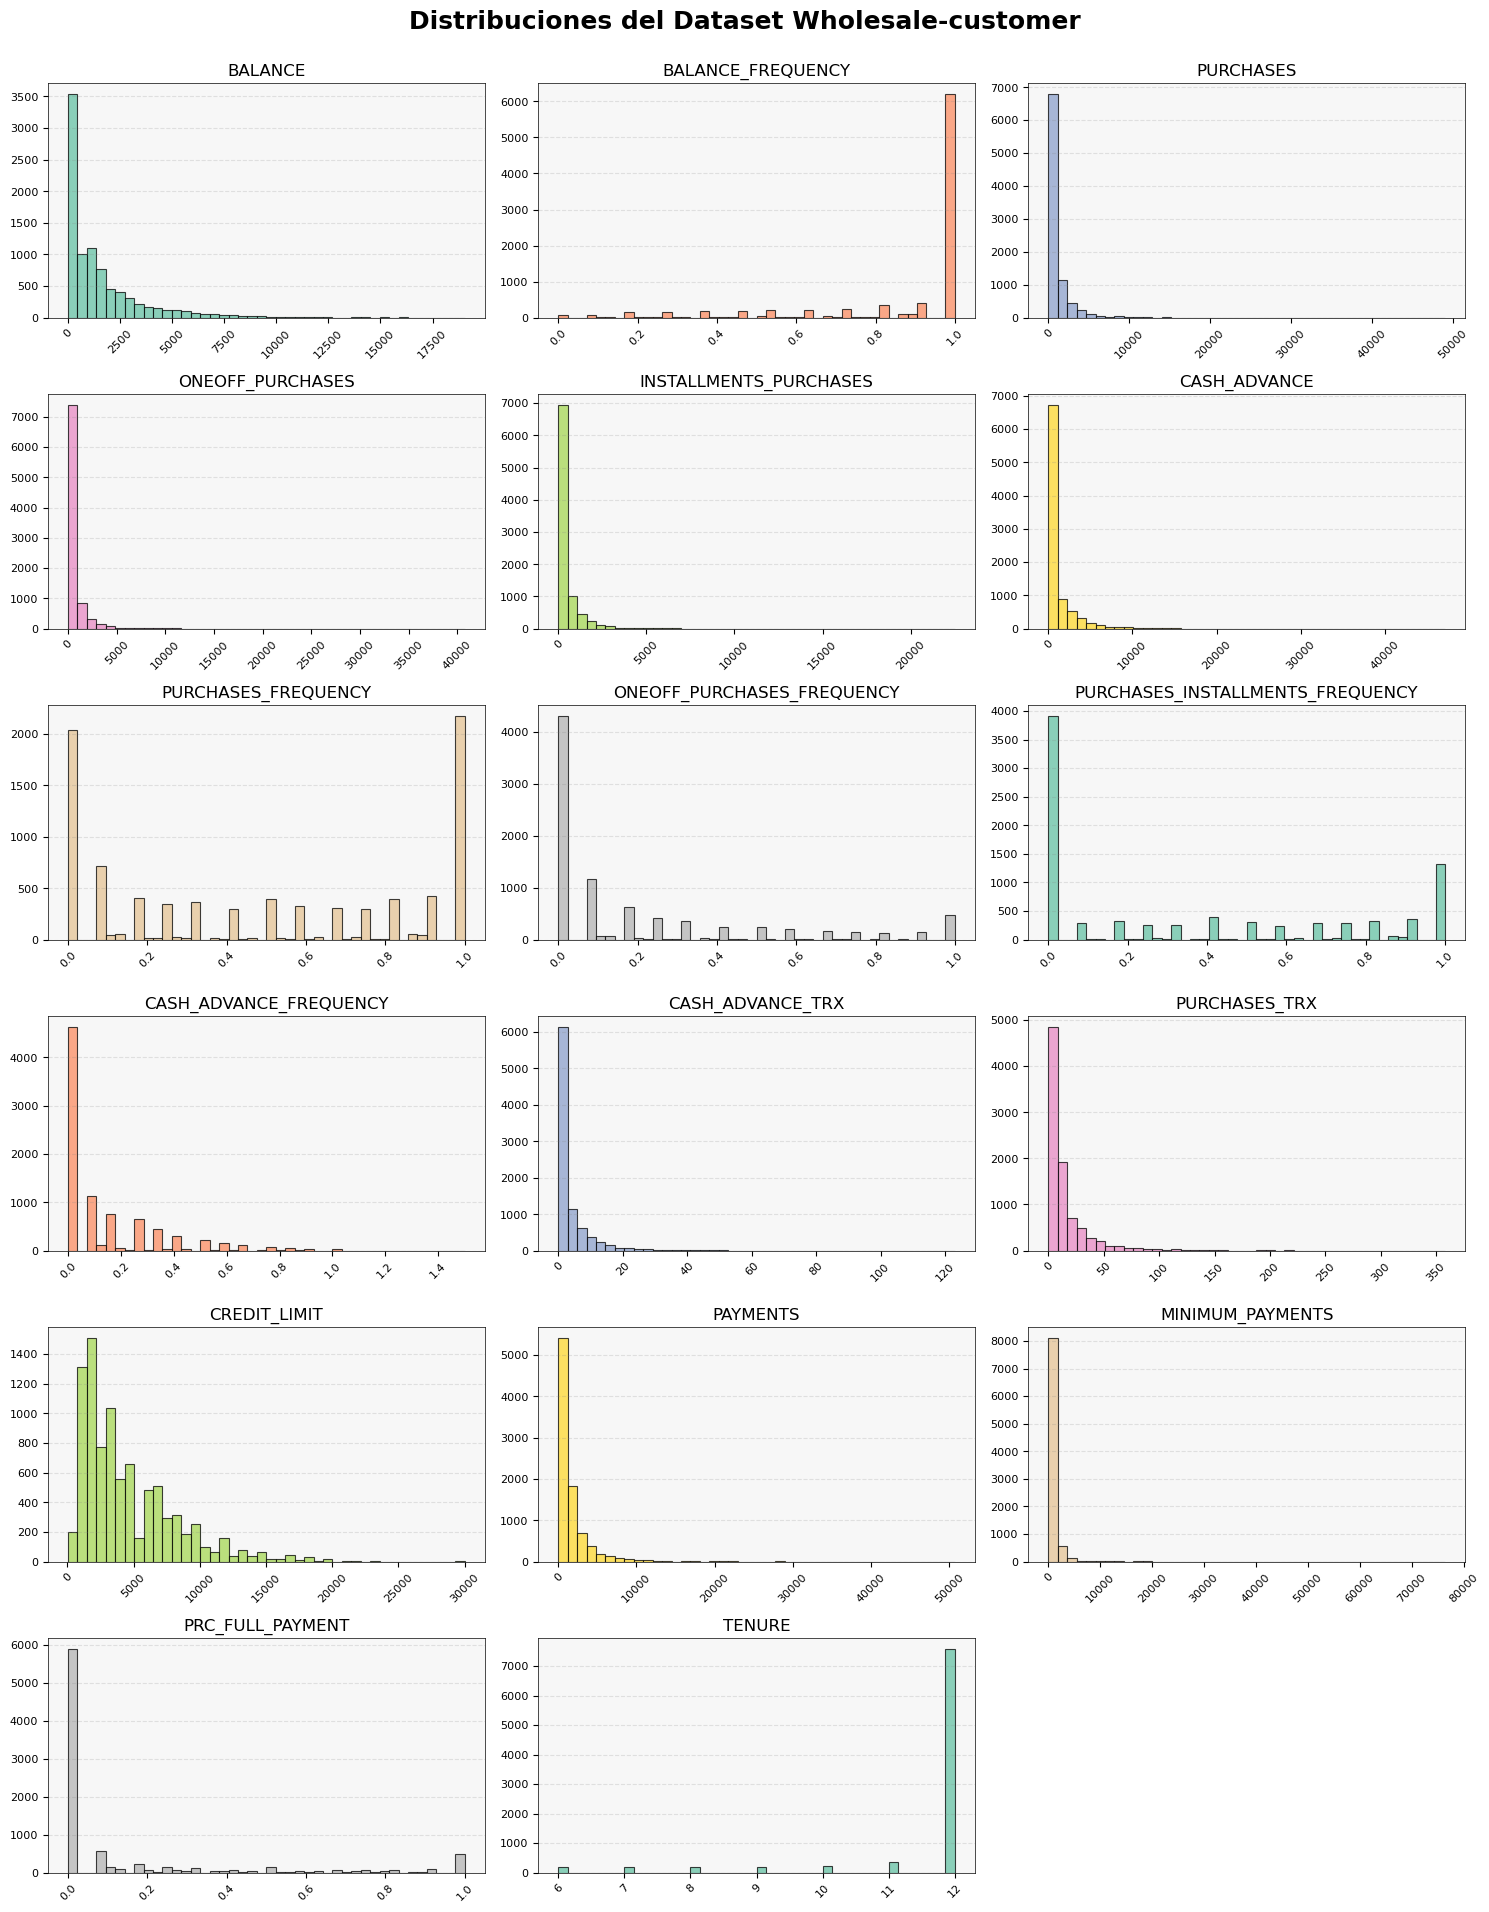

In [11]:
#Histograma para todas las variables numericas del dataset

fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(15, 25)) 
axes = axes.flatten()

colors = sns.color_palette("Set2", len(df.columns))
for i, col in enumerate(df.columns):
    if i < len(axes):  
         # Cambiar a ax.hist()
        axes[i].hist(df[col], bins='rice', color=colors[i], alpha=0.75, edgecolor='black', linewidth=0.8)
        
        # Estética
        axes[i].set_title(col, fontsize=12, pad=5)
        axes[i].grid(axis='y', linestyle='--', color='gray', alpha=0.2)
        axes[i].set_facecolor('#f7f7f7')
        axes[i].spines['top'].set_color('black')
        axes[i].spines['top'].set_linewidth(0.5)
        axes[i].spines['right'].set_color('black')
        axes[i].spines['right'].set_linewidth(0.5)
        axes[i].spines['left'].set_color('black')
        axes[i].spines['left'].set_linewidth(0.5)
        axes[i].spines['bottom'].set_color('black')
        axes[i].spines['bottom'].set_linewidth(0.5)
        axes[i].tick_params(axis='x', rotation=45, labelsize=8, colors='black')
        axes[i].tick_params(axis='y', labelsize=8, colors='black')

# Eliminar ejes sobrantes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Título general y espaciado
fig.suptitle('Distribuciones del Dataset Wholesale-customer', fontsize=18, fontweight='bold', y= 1)
plt.tight_layout()
plt.show()


#### **Analisis de Outliers**

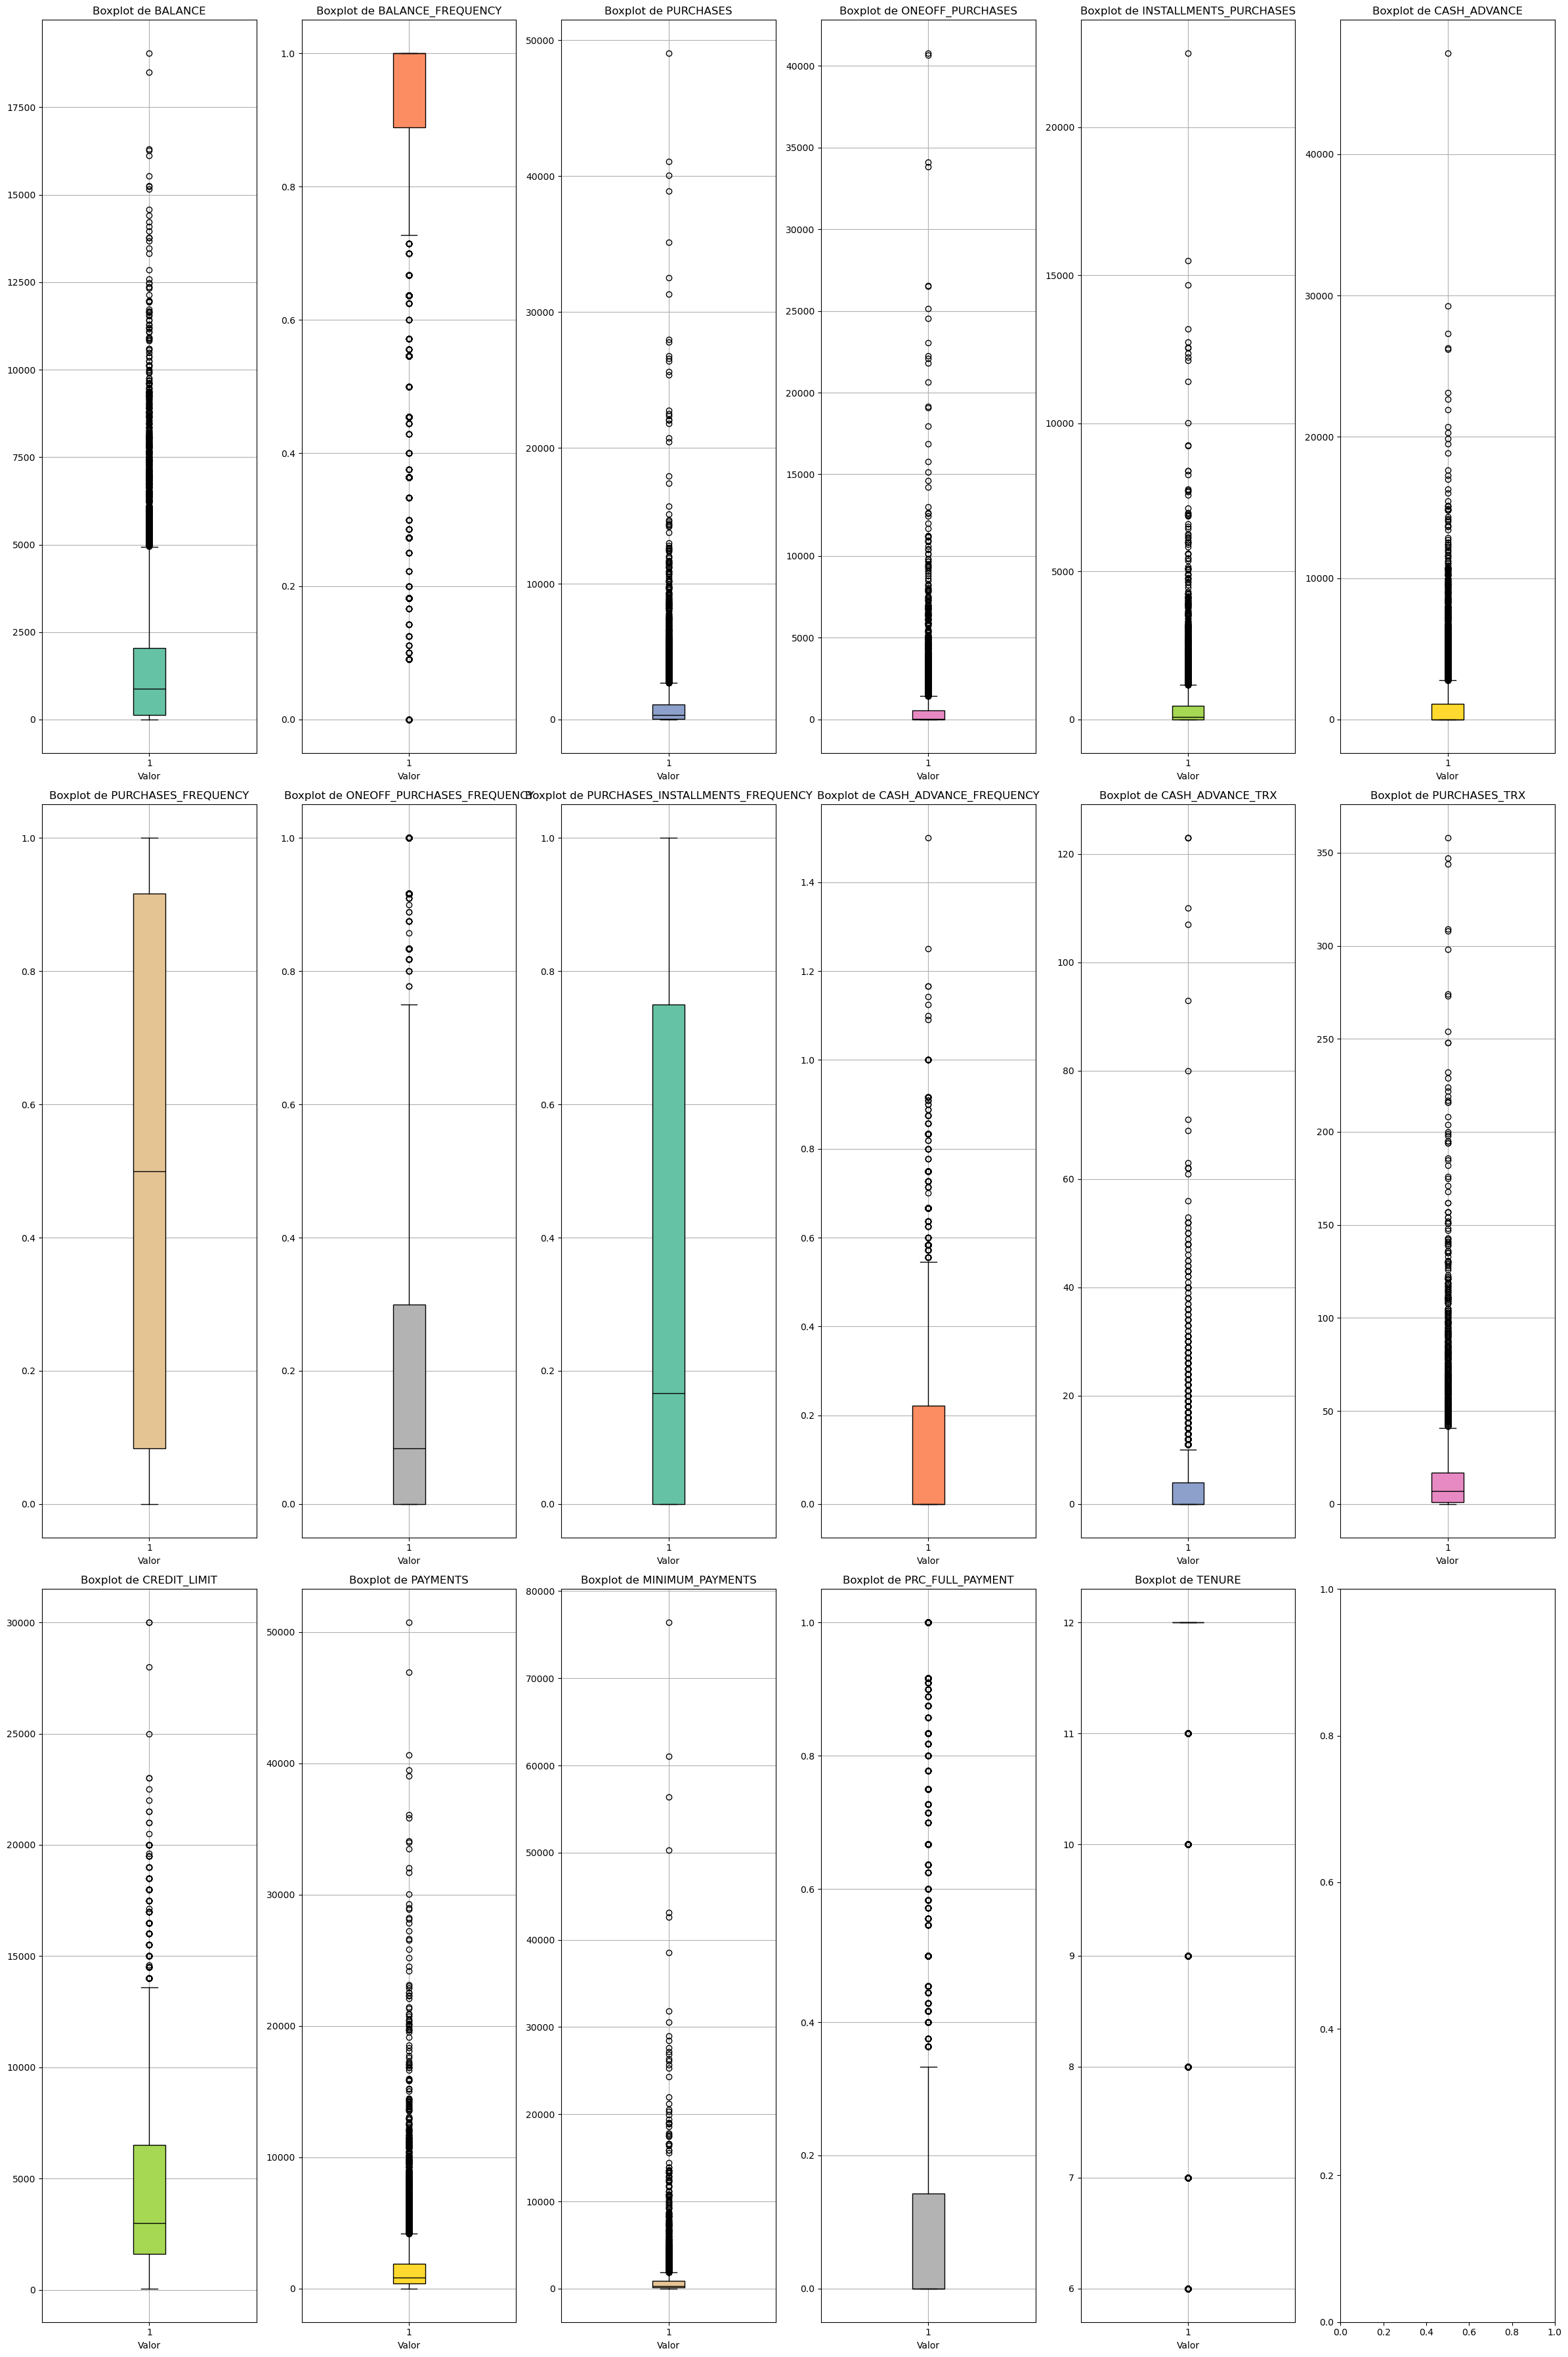

In [12]:
# Obtener el número de columnas que se desean graficar
num_cols = df.select_dtypes(include=[np.number]).shape[1]  # Solo columnas numéricas

# Crear un número adecuado de subgráficos con un máximo de 6 columnas por fila
ncols = 6  # Máximo 6 columnas por fila
nrows = -(-num_cols // ncols)  # Calcular filas necesarias, redondeando hacia arriba
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4 * ncols, 12 * nrows))
axes = axes.flatten()  # Asegurarse de que 'axes' sea un arreglo plano


# Obtener una paleta de colores de seaborn
colors = sns.color_palette("Set2", num_cols)

# Graficar cada variable en un boxplot separado
for i, col in enumerate(df.select_dtypes(include=[np.number]).columns):
    # Convertir la columna a numérica, forzando valores no numéricos a NaN
    datos_columna = pd.to_numeric(df[col], errors='coerce')
    
    # Graficar solo si la columna contiene datos numéricos
    if datos_columna.dropna().shape[0] > 0:  # Verificar que haya valores válidos
        # Asignar color y modificar la línea de la mediana
        axes[i].boxplot(datos_columna.dropna(), vert=True, patch_artist=True, 
                        boxprops=dict(facecolor=colors[i]),
                        medianprops=dict(color='black'))  # Línea de la mediana en negro
        axes[i].set_title(f'Boxplot de {col}')
        axes[i].set_xlabel('Valor')
        axes[i].grid()

# Ajustar el diseño
plt.tight_layout()
plt.show()


In [13]:
# Create a summary DataFrame for outliers
outliers_summary = pd.DataFrame()
for column in df:
    outliers = utils.detect_outliers_iqr(df[column])
    outliers_summary[column] = {
        'Number of Outliers': outliers.sum(),
        'Percentage of Outliers': 100 * outliers.mean(),
        'Lower Bound': df[column][~outliers].min(),
        'Upper Bound': df[column][~outliers].max()
    }

outliers_summary.T

,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
BALANCE,695.0,7.765363,0.000000,4940.113918
BALANCE_FREQUENCY,1493.0,16.681564,0.727273,1.000000
PURCHASES,808.0,9.027933,0.000000,2711.900000
ONEOFF_PURCHASES,1013.0,11.318436,0.000000,1443.330000
INSTALLMENTS_PURCHASES,867.0,9.687151,0.000000,1170.490000
CASH_ADVANCE,1030.0,11.508380,0.000000,2784.294727
PURCHASES_FREQUENCY,0.0,0.000000,0.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,782.0,8.737430,0.000000,0.750000
PURCHASES_INSTALLMENTS_FREQUENCY,0.0,0.000000,0.000000,1.000000
CASH_ADVANCE_FREQUENCY,525.0,5.865922,0.000000,0.545455


Creamos una copia para trabajar mejor

In [14]:
df2 = df.copy()

Seleccionamos las variables interesantes

In [15]:
# Selecciona las varibles 'BALANCE', 'PURCHASES', 'CREDIT_LIMIT'
data = df2[['BALANCE', 'PURCHASES', 'CREDIT_LIMIT']]

Sin eliminar Outliers

Escalamos

In [16]:
# Opcional, escalar las variables con zscore
data = (data - data.mean()) / data.std()

Implementamos kmens con 3,4,5 centroids

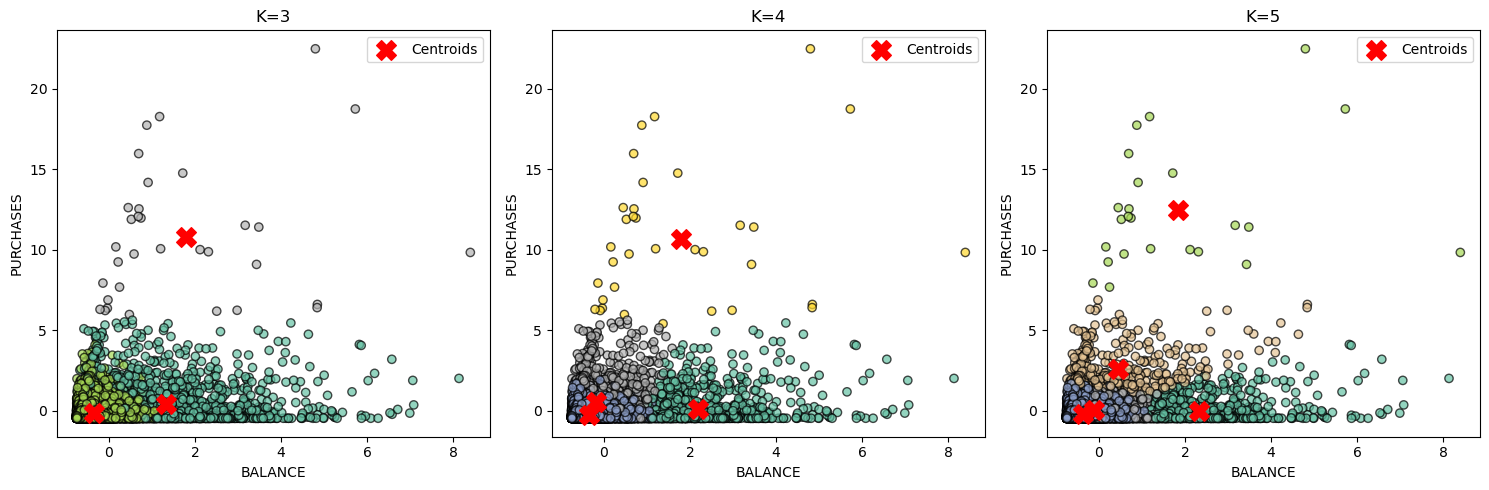

In [17]:
# 3. Implementación de K-means
k_values = [3, 4, 5,]
plt.figure(figsize=(15, 5))

for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(data)
    centroids = kmeans.cluster_centers_
    
    # Gráfico de dispersión
    plt.subplot(1, len(k_values), i + 1)
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=clusters, cmap='Set2', alpha=0.7, edgecolor='k')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.title(f'K={k}')
    plt.xlabel('BALANCE')
    plt.ylabel('PURCHASES')
    plt.legend()

plt.tight_layout()
plt.show()

Inercia y Solhouette

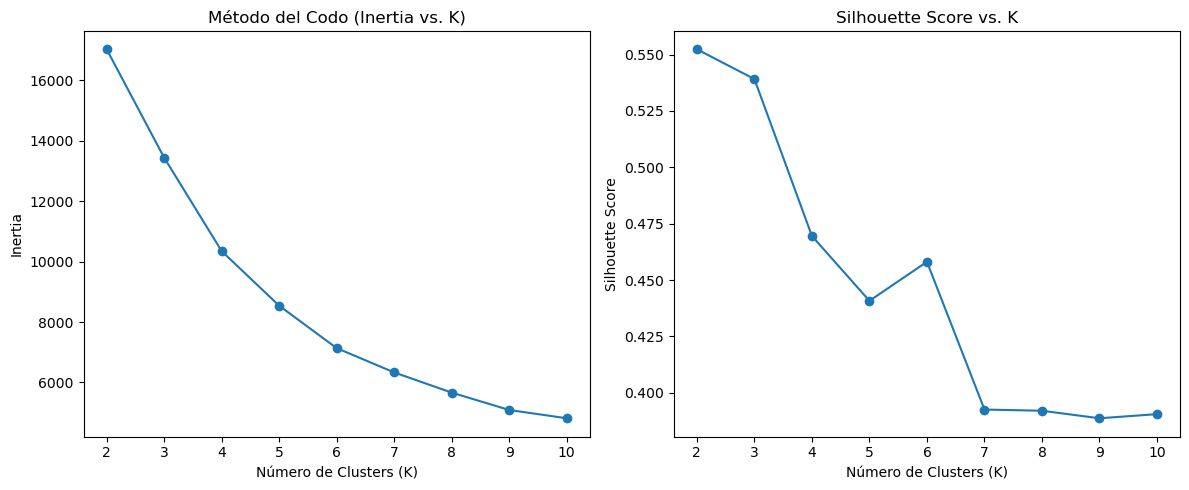

In [18]:
# Calcular Inertia y Silhouette Score para diferentes valores de K
inertia = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data, kmeans.labels_))

# Crear gráficos
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de Inertia
ax[0].plot(k_values, inertia, marker='o')
ax[0].set_title('Método del Codo (Inertia vs. K)')
ax[0].set_xlabel('Número de Clusters (K)')
ax[0].set_ylabel('Inertia')

# Gráfico de Silhouette Score
ax[1].plot(k_values, silhouette_scores, marker='o')
ax[1].set_title('Silhouette Score vs. K')
ax[1].set_xlabel('Número de Clusters (K)')
ax[1].set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


DBSCAN

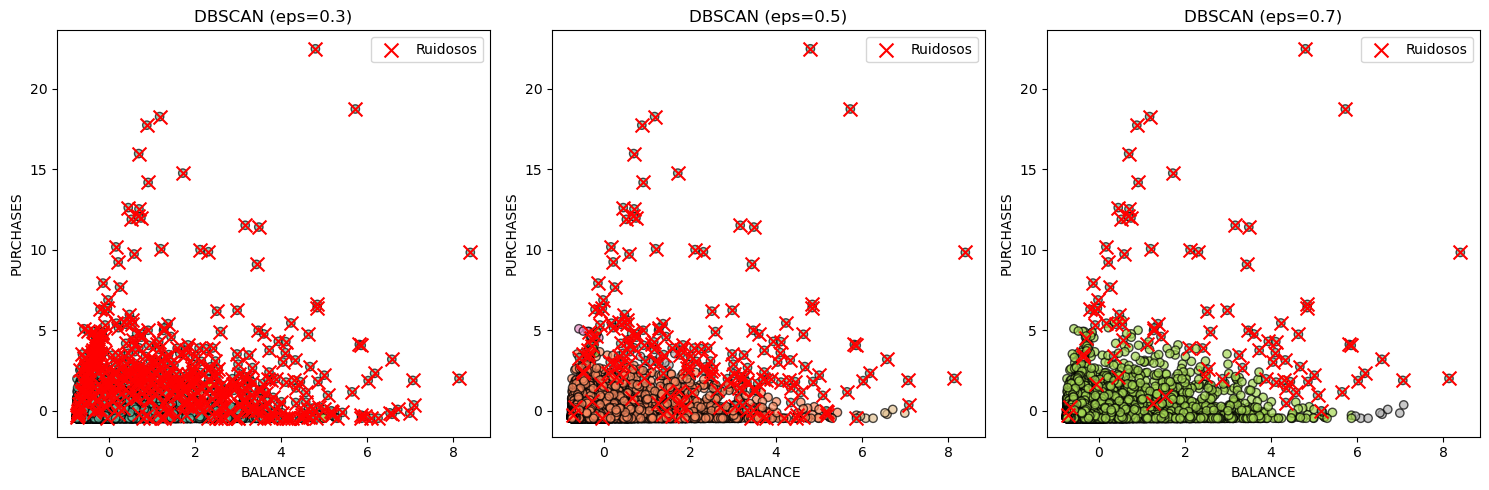

In [19]:
# Seleccionar las variables
data = df2[['BALANCE', 'PURCHASES', 'CREDIT_LIMIT']]

# Normalización de los datos
data = (data - data.mean()) / data.std()

# 3. Implementación de DBSCAN
eps_values = [0.3, 0.5, 0.7]  # Diferentes valores de eps
plt.figure(figsize=(15, 5))

for i, eps in enumerate(eps_values):
    # Aplicar DBSCAN con diferentes valores de eps
    dbscan = DBSCAN(eps=eps, min_samples=5)
    clusters_dbscan = dbscan.fit_predict(data)
    
    # Gráfico de dispersión
    plt.subplot(1, len(eps_values), i + 1)
    
    # Graficar los puntos según los clusters
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=clusters_dbscan, cmap='Set2', alpha=0.7, edgecolor='k')
    
    # Resaltar los puntos ruidosos (outliers)
    plt.scatter(data.iloc[clusters_dbscan == -1, 0], data.iloc[clusters_dbscan == -1, 1], color='red', s=100, label='Ruidosos', marker='x')
    
    plt.title(f'DBSCAN (eps={eps})')
    plt.xlabel('BALANCE')
    plt.ylabel('PURCHASES')
    plt.legend()

plt.tight_layout()
plt.show()


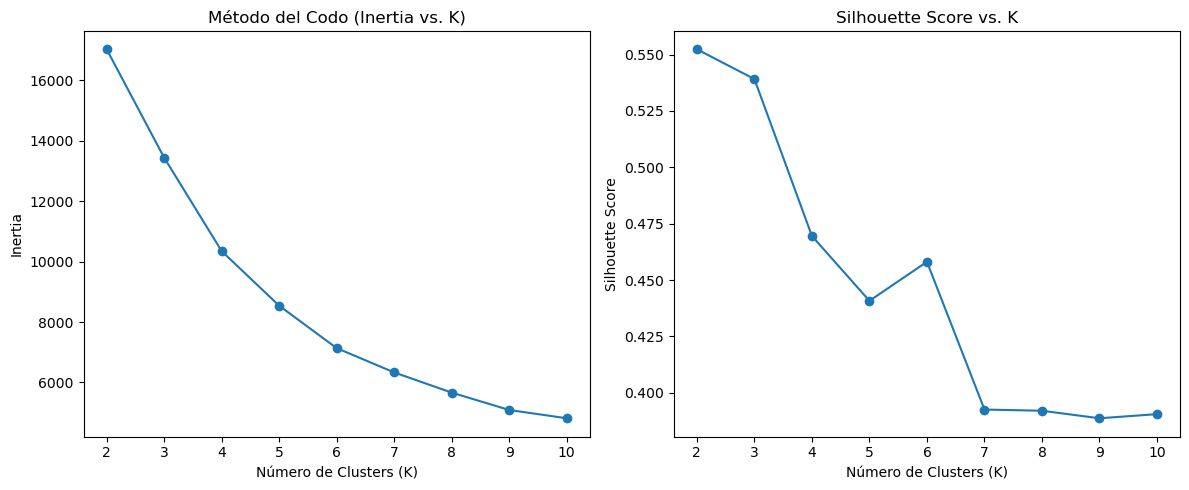

In [20]:
# 4. Calcular Inertia y Silhouette Score para diferentes valores de K (solo KMeans)
inertia = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    # KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data, kmeans.labels_))

# Crear gráficos de Inertia y Silhouette Score
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de Inertia (Método del Codo)
ax[0].plot(k_values, inertia, marker='o')
ax[0].set_title('Método del Codo (Inertia vs. K)')
ax[0].set_xlabel('Número de Clusters (K)')
ax[0].set_ylabel('Inertia')

# Gráfico de Silhouette Score
ax[1].plot(k_values, silhouette_scores, marker='o')
ax[1].set_title('Silhouette Score vs. K')
ax[1].set_xlabel('Número de Clusters (K)')
ax[1].set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


Eliminando Outliers

In [21]:
# Selecciona las variables 'BALANCE', 'PURCHASES', 'CREDIT_LIMIT'
data = df2[['BALANCE', 'PURCHASES', 'CREDIT_LIMIT']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Filtrar outliers invirtiendo la condición lógica
mask = ((data >= (Q1 - 1.5 * IQR)) & (data <= (Q3 + 1.5 * IQR))).all(axis=1)
data_cleaned = data[mask]

# Mostrar el dataframe sin outliers
print(data_cleaned)



          BALANCE  PURCHASES  CREDIT_LIMIT
0       40.900749      95.40        1000.0
1     3202.467416       0.00        7000.0
2     2495.148862     773.17        7500.0
3     1666.670542    1499.00        7500.0
4      817.714335      16.00        1200.0
...           ...        ...           ...
8945    28.493517     291.12        1000.0
8946    19.183215     300.00        1000.0
8947    23.398673     144.40        1000.0
8948    13.457564       0.00         500.0
8949   372.708075    1093.25        1200.0

[7515 rows x 3 columns]


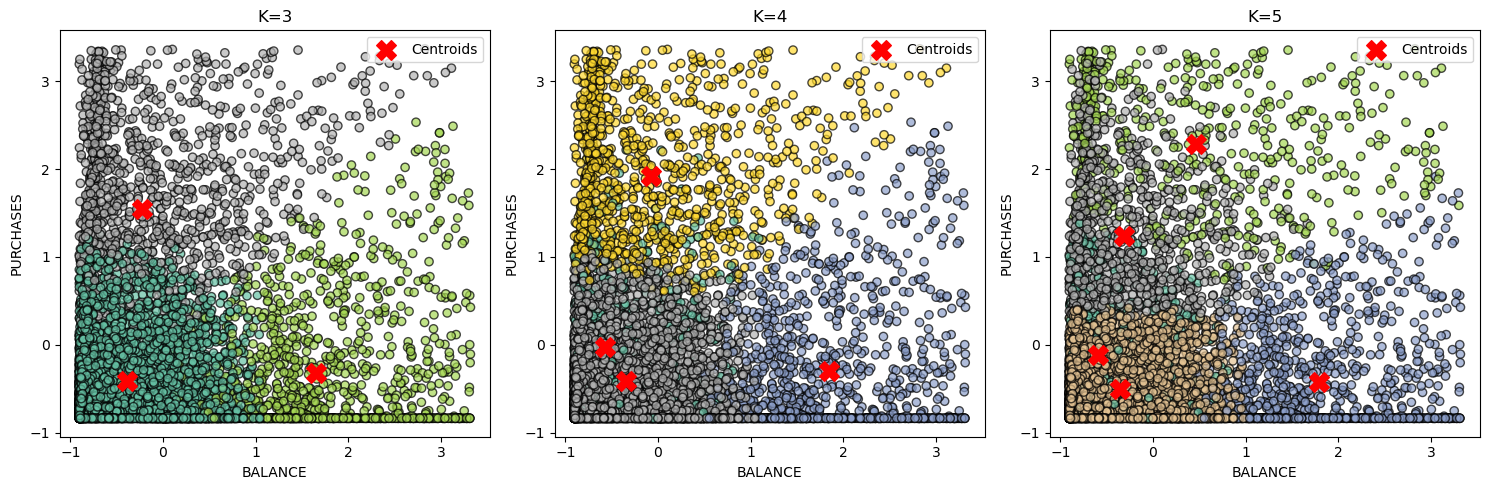

In [22]:
# Opcional, escalar las variables con zscore
data_cleaned = (data_cleaned - data_cleaned.mean()) / data_cleaned.std()
# 3. Implementación de K-means
k_values = [3, 4, 5]
plt.figure(figsize=(15, 5))

for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(data_cleaned)  # Usar data_cleaned
    centroids = kmeans.cluster_centers_
    
    # Gráfico de dispersión
    plt.subplot(1, len(k_values), i + 1)
    plt.scatter(data_cleaned.iloc[:, 0], data_cleaned.iloc[:, 1], c=clusters, cmap='Set2', alpha=0.7, edgecolor='k')  # Usar data_cleaned
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.title(f'K={k}')
    plt.xlabel('BALANCE')
    plt.ylabel('PURCHASES')
    plt.legend()

plt.tight_layout()
plt.show()


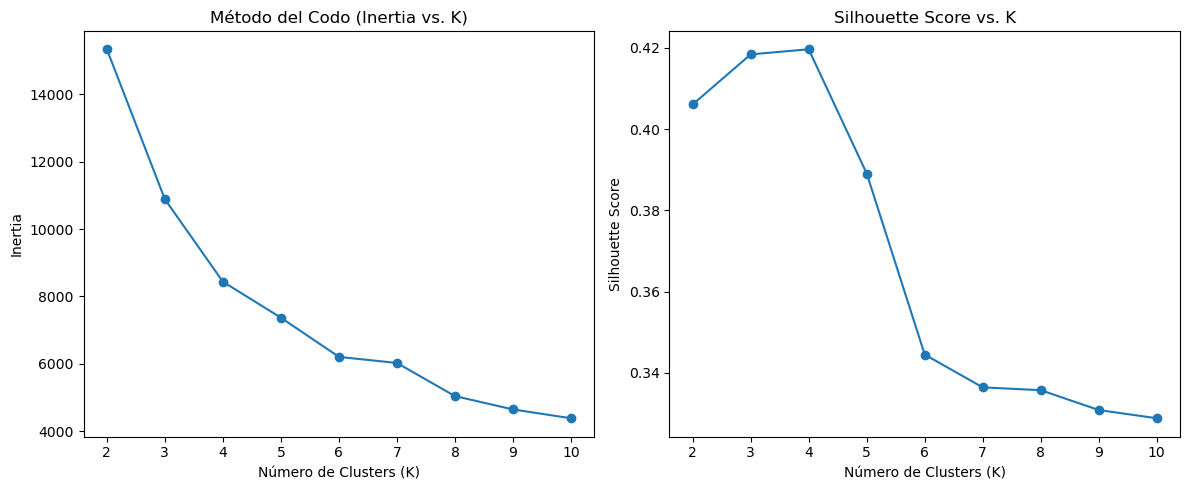

In [23]:
# 4. Calcular Inertia y Silhouette Score para diferentes valores de K (solo KMeans)
inertia = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    # KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_cleaned)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_cleaned, kmeans.labels_))

# Crear gráficos de Inertia y Silhouette Score
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de Inertia (Método del Codo)
ax[0].plot(k_values, inertia, marker='o')
ax[0].set_title('Método del Codo (Inertia vs. K)')
ax[0].set_xlabel('Número de Clusters (K)')
ax[0].set_ylabel('Inertia')

# Gráfico de Silhouette Score
ax[1].plot(k_values, silhouette_scores, marker='o')
ax[1].set_title('Silhouette Score vs. K')
ax[1].set_xlabel('Número de Clusters (K)')
ax[1].set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()
